In [1]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border: 0.5px solid #000000;
        text-align: center !important;
    }
    th {
        background-color: #008B8B;
    }
    
</style>


In [2]:
import pandas as pd

a = ['Invoice', 'Cereal','Milk','Bread','Eggs','Yogurt']
b = [1,0,1,0,1,1]
c = [2,1,0,0,1,0]
d = [3,1,1,1,1,0]
e = [4,1,1,0,0,0]
f = [5,0,1,0,1,0]
g = [b,c,d,e,f]
pd.DataFrame(g,columns=a)

,Invoice,Cereal,Milk,Bread,Eggs,Yogurt
0,1,0,1,0,1,1
1,2,1,0,0,1,0
2,3,1,1,1,1,0
3,4,1,1,0,0,0
4,5,0,1,0,1,0


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('max_columns',10)
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [5]:
df

,0,1,2,3,4,...,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,...,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,...,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


### Exploratory Data Analysis

Text(0.5, 1.0, 'Most Popular Items')

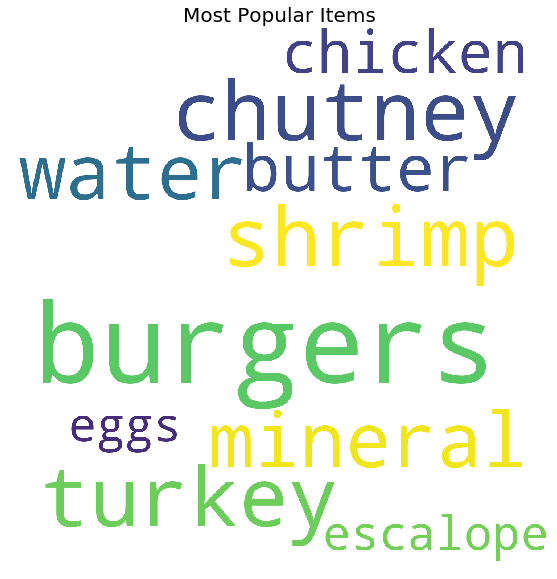

In [7]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1500,  height = 1500, max_words = 10).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)

In [8]:
df_allitem = df.copy()

In [9]:
df_allitem.fillna('',inplace=True)

In [10]:
df_allitem.loc[1]

0       burgers
1     meatballs
2          eggs
3              
4              
5              
6              
7              
8              
9              
10             
11             
12             
13             
14             
15             
16             
17             
18             
19             
Name: 1, dtype: object

In [11]:
all_item = []
for item in range(len(df_allitem)):
    a = df_allitem.loc[item].values
    a = ' '.join(a)
    all_item.append(a) 

In [12]:
all_item_series= pd.Series(all_item)

In [13]:
all_item_series

0       shrimp almonds avocado vegetables mix green gr...
1                 burgers meatballs eggs                 
2                              chutney                   
3                        turkey avocado                  
4       mineral water milk energy bar whole wheat rice...
                              ...                        
7496       butter light mayo fresh bread                 
7497    burgers frozen vegetables eggs french fries ma...
7498                           chicken                   
7499                 escalope green tea                  
7500    eggs frozen smoothie yogurt cake low fat yogur...
Length: 7501, dtype: object

Text(0.5, 1.0, 'Most Popular Items')

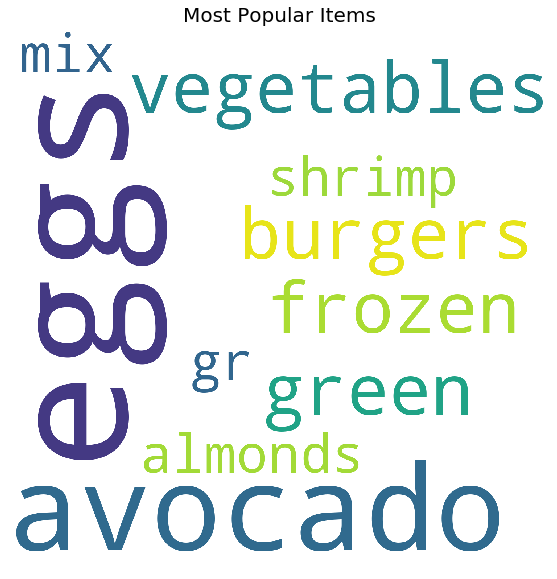

In [14]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1500,  height = 1500, max_words = 10).generate(str(all_item_series))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)

In [15]:
df_allitem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       7501 non-null   object
 2   2       7501 non-null   object
 3   3       7501 non-null   object
 4   4       7501 non-null   object
 5   5       7501 non-null   object
 6   6       7501 non-null   object
 7   7       7501 non-null   object
 8   8       7501 non-null   object
 9   9       7501 non-null   object
 10  10      7501 non-null   object
 11  11      7501 non-null   object
 12  12      7501 non-null   object
 13  13      7501 non-null   object
 14  14      7501 non-null   object
 15  15      7501 non-null   object
 16  16      7501 non-null   object
 17  17      7501 non-null   object
 18  18      7501 non-null   object
 19  19      7501 non-null   object
dtypes: object(20)
memory usage: 1.1+ MB


In [16]:
dff = df.copy()

In [17]:
dff.fillna('None',inplace=True)

In [18]:
c = []
for item in range(len(dff)): 
    y = dff.loc[item].values
    for values in y:
        a = values.split()
        c.append(a)
d = []
for item in c:
    if len(item) == 2 :
        d.append([item[0] + item[1].capitalize()])
    elif len(item) == 3 :
        d.append([item[0] + item[1].capitalize() + item[2].capitalize()])
    else :
        d.append(item)

In [19]:
dff = pd.DataFrame(d,columns=['Product'])

In [20]:
dff = pd.DataFrame(d,columns=['Product'])
index_to_drop = dff[dff['Product'] == 'None'].index
dff = dff.drop(index_to_drop).reset_index(drop=True)

Text(0.5, 1.0, 'Most Popular Product')

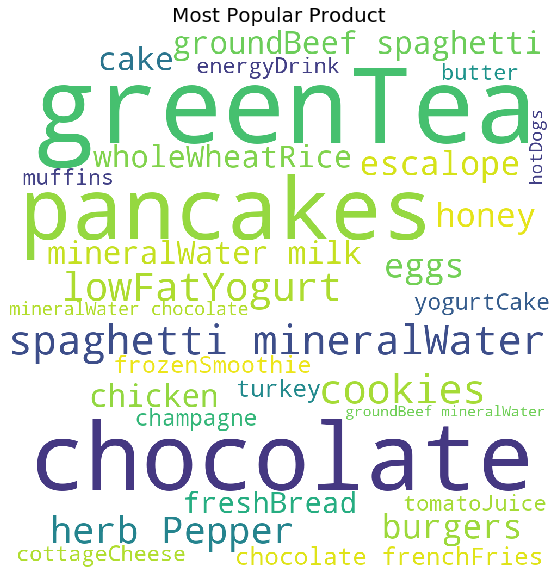

In [21]:
all_item = ' '.join([item for item in dff['Product']]) 

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1000,  height = 1000, max_words = 30).generate(all_item)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Product',fontsize = 20)

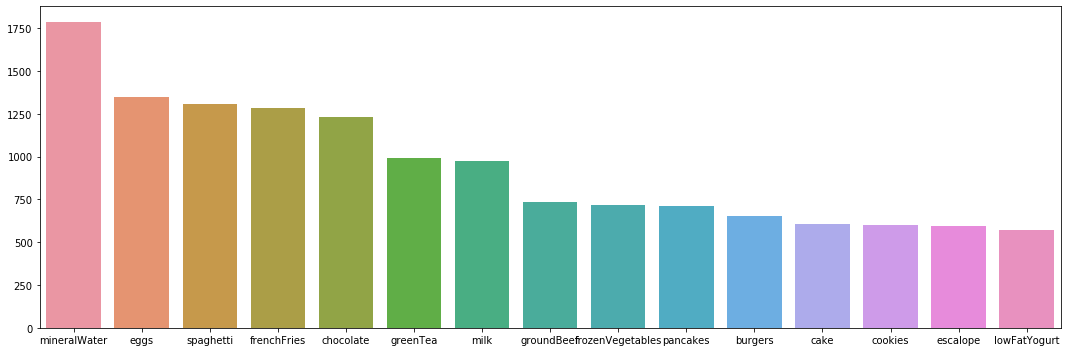

In [22]:
item_15 = dff.Product.value_counts().head(15)
plt.figure(figsize=(15,5))
sns.barplot(x=item_15.index,y=item_15.values)
plt.tight_layout()

### Data preprocessing

In [23]:
list_all_item = []
for i in range(0, 7501):
    list_all_item.append([str(df.values[i,j]) for j in range(0, 20)])
    
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te.fit(list_all_item)
data = te.transform(list_all_item)
data = pd.DataFrame(data, columns = te.columns_)

In [24]:
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,...,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,...,False,False,True,False,False
1,False,False,False,False,False,...,False,False,False,False,False
2,False,False,False,False,False,...,False,False,False,False,False
3,False,False,False,False,True,...,False,False,False,False,False
4,False,False,False,False,False,...,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,...,False,False,False,False,False
7497,False,False,False,False,False,...,False,False,False,False,False
7498,False,False,False,False,False,...,False,False,False,False,False
7499,False,False,False,False,False,...,False,False,False,False,False


In [25]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets= apriori(data, min_support = 0.01, use_colnames = True)

In [26]:
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
510,0.011065,"(milk, ground beef, mineral water, nan)"
511,0.017064,"(ground beef, spaghetti, mineral water, nan)"
512,0.015731,"(milk, spaghetti, mineral water, nan)"
513,0.010265,"(olive oil, spaghetti, mineral water, nan)"


In [27]:
## Create association rules for each itemset (frequent_itemsets)
### Metric to evaluate if a rule is of interest. I using "Lift"

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)

## Handle mising values for consequents columns
index_to_drop_cons = rules[rules['consequents'] == frozenset({'nan'})].index
rules.drop(index_to_drop_cons,inplace=True)

## Handle mising values for antecedents columns
index_to_drop_ante = rules[rules['antecedents'] == frozenset({'nan'})].index
rules.drop(index_to_drop_ante,inplace=True)

In [28]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1639,"(ground beef, eggs, nan)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1642,"(ground beef, eggs)","(mineral water, nan)",0.019997,0.238235,0.010132,0.506667,2.126752,0.005368,1.544118
888,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1723,"(ground beef, milk, nan)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
1254,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
...,...,...,...,...,...,...,...,...,...
1689,"(mineral water, nan)","(french fries, spaghetti)",0.238235,0.027596,0.010132,0.042529,1.541125,0.003558,1.015596
893,(mineral water),"(ground beef, eggs)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507
1650,(mineral water),"(ground beef, eggs, nan)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507
1049,(mineral water),"(french fries, spaghetti)",0.238368,0.027596,0.010132,0.042506,1.540263,0.003554,1.015571


In [29]:
a = rules.consequents.values[0]

In [30]:
# Function to change antecendents and consequents to list from immutable 
new_cons = []
for item in rules['consequents']:
    a = list(item)
    new_cons.append(', '.join(a))

new_ante = []
for item in rules['antecedents']:
    a = list(item)
    new_ante.append(', '.join(a))
    
# Apply list to each columns antecedents & consequents 
rules['antecedents'] = new_ante
rules['consequents'] = new_cons

# Drop missing values for each columns consequents & antecedents
index_to_drop_cons = rules[rules['consequents'].str.contains('nan')].index
rules.drop(index_to_drop_cons,inplace=True)

index_to_drop_ante= rules[rules['antecedents'].str.contains('nan')].index
rules.drop(index_to_drop_ante,inplace=True)

rules.reset_index(drop=True,inplace=True)

In [31]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"ground beef, eggs",mineral water,0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1,"ground beef, milk",mineral water,0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
2,"ground beef, chocolate",mineral water,0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
3,"frozen vegetables, milk",mineral water,0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136
4,soup,mineral water,0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
5,"pancakes, spaghetti",mineral water,0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557
6,"olive oil, spaghetti",mineral water,0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954
7,"spaghetti, milk",mineral water,0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879
8,"chocolate, milk",mineral water,0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656
9,"ground beef, spaghetti",mineral water,0.039195,0.238368,0.017064,0.435374,1.826477,0.007722,1.348914
